In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import cross_val_score

In [134]:
dataset = pd.read_csv('./files/dataset.csv')

dataset.head()

,Feature Model,Number of Features,Number of Mandatory Features,Number of Top Features,Number of Leaf Features,Depth of Tree Max,Cognitive Complexity of Feature Model,Feature Extensibility,Flexibility of Configuration,Single Cylic Dependent Features,Multiple Cyclic Dependent Features,Number of Features Referenced in Constraints Mean,Ratio of Variability,Number of Valid Configurations,Number of Groups OR,Number of Groups XOR,Maintainability
0,RaaS,32,2,19,28,3,3,28,0.531250,0,0,0.0,4.857143,125829120.0,3,0,moderate
1,AvionFEatures,10,4,5,7,3,2,7,0.100000,0,0,0.0,2.200000,12.0,2,0,verygood
2,Bike Shop,21,3,5,15,5,5,27,0.095238,9,3,0.0,2.272727,70.0,1,4,good
3,Jetbrains,33,13,3,25,4,2,28,0.272727,3,0,2.0,3.400000,4884.0,0,2,moderate
4,Ubuntu,11,3,4,7,3,3,7,0.090909,0,0,1.0,1.857143,12.0,0,3,verygood


In [135]:
X = dataset.iloc[:, 1:-1]
y = dataset.iloc[:, -1]

X.head()

,Number of Features,Number of Mandatory Features,Number of Top Features,Number of Leaf Features,Depth of Tree Max,Cognitive Complexity of Feature Model,Feature Extensibility,Flexibility of Configuration,Single Cylic Dependent Features,Multiple Cyclic Dependent Features,Number of Features Referenced in Constraints Mean,Ratio of Variability,Number of Valid Configurations,Number of Groups OR,Number of Groups XOR
0,32,2,19,28,3,3,28,0.531250,0,0,0.0,4.857143,125829120.0,3,0
1,10,4,5,7,3,2,7,0.100000,0,0,0.0,2.200000,12.0,2,0
2,21,3,5,15,5,5,27,0.095238,9,3,0.0,2.272727,70.0,1,4
3,33,13,3,25,4,2,28,0.272727,3,0,2.0,3.400000,4884.0,0,2
4,11,3,4,7,3,3,7,0.090909,0,0,1.0,1.857143,12.0,0,3


In [136]:
scaler = StandardScaler()
clf = DecisionTreeClassifier(random_state=0, max_depth=5)
pipeline = make_pipeline(scaler, clf)
pipeline.fit(X, y)

scores = cross_val_score(pipeline, X, y, cv=10)

print("Scores:", scores)
print("Mean:", np.mean(scores), "| Standard Deviation:", np.std(scores))

Scores: [0.74285714 0.82857143 0.82352941 0.70588235 0.73529412 0.88235294
 0.70588235 0.91176471 0.79411765 0.76470588]
Mean: 0.7894957983193278 | Standard Deviation: 0.067814917788357


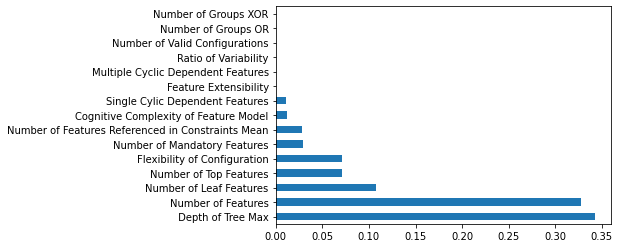

In [137]:
feature_importances = pd.Series(clf.feature_importances_, index = X.columns) 
feature_importances.nlargest(15).plot(kind = 'barh') 

plt.show()

In [142]:
# X = dataset.iloc[:, [1, 2, 4, 5, 6, 7, 14, 15]] # Correlation
X = dataset.iloc[:, [1, 2, 3, 4, 5, 6, 8, 9, 11]] # Select From Model

X.head()

,Number of Features,Number of Mandatory Features,Number of Top Features,Number of Leaf Features,Depth of Tree Max,Cognitive Complexity of Feature Model,Flexibility of Configuration,Single Cylic Dependent Features,Number of Features Referenced in Constraints Mean
0,32,2,19,28,3,3,0.531250,0,0.0
1,10,4,5,7,3,2,0.100000,0,0.0
2,21,3,5,15,5,5,0.095238,9,0.0
3,33,13,3,25,4,2,0.272727,3,2.0
4,11,3,4,7,3,3,0.090909,0,1.0


In [139]:
clf = DecisionTreeClassifier(random_state=0, max_depth=5)
pipeline = make_pipeline(clf)
pipeline.fit(X, y)

scores_accuracy = cross_val_score(pipeline, X, y, cv=10)

print("\n>> Accuracy")
print("Scores:", scores_accuracy)
print("Min:", np.min(scores_accuracy))
print("Max:", np.max(scores_accuracy))
print("Mean:", np.mean(scores_accuracy))
print("Standard Deviation:", np.std(scores_accuracy))

scores_precision = cross_val_score(pipeline, X, y, cv=10, scoring="precision_micro")

print("\n>> Precision")
print("Scores:", scores_precision)
print("Min:", np.min(scores_precision))
print("Max:", np.max(scores_precision))
print("Mean:", np.mean(scores_precision))
print("Standard Deviation:", np.std(scores_precision))

scores_recall = cross_val_score(pipeline, X, y, cv=10, scoring="recall_macro")

print("\n>> Recall")
print("Scores:", scores_recall)
print("Min:", np.min(scores_recall))
print("Max:", np.max(scores_recall))
print("Mean:", np.mean(scores_recall))
print("Standard Deviation:", np.std(scores_recall))

scores_f1 = cross_val_score(pipeline, X, y, cv=10, scoring="f1_macro")

print("\n>> F1")
print("Scores:", scores_f1)
print("Min:", np.min(scores_f1))
print("Max:", np.max(scores_f1))
print("Mean:", np.mean(scores_f1))
print("Standard Deviation:", np.std(scores_f1))

scores_roc_auc = cross_val_score(pipeline, X, y, cv=10, scoring="roc_auc_ovo_weighted")

print("\n>> ROC_AUC")
print("Scores:", scores_roc_auc)
print("Min:", np.min(scores_roc_auc))
print("Max:", np.max(scores_roc_auc))
print("Mean:", np.mean(scores_roc_auc))
print("Standard Deviation:", np.std(scores_roc_auc))


>> Accuracy
Scores: [0.74285714 0.82857143 0.82352941 0.82352941 0.73529412 0.88235294
 0.73529412 0.94117647 0.82352941 0.76470588]
Min: 0.7352941176470589
Max: 0.9411764705882353
Mean: 0.8100840336134454
Standard Deviation: 0.06407638792774241

>> Precision
Scores: [0.74285714 0.82857143 0.82352941 0.82352941 0.73529412 0.88235294
 0.73529412 0.94117647 0.82352941 0.76470588]
Min: 0.7352941176470589
Max: 0.9411764705882353
Mean: 0.8100840336134454
Standard Deviation: 0.06407638792774241

>> Recall
Scores: [0.71032967 0.76556777 0.77032967 0.8717033  0.60285714 0.84809524
 0.68527473 0.93142857 0.73619048 0.66666667]
Min: 0.6028571428571429
Max: 0.9314285714285713
Mean: 0.7588443223443224
Standard Deviation: 0.09579842858005341

>> F1
Scores: [0.667      0.7518951  0.74937374 0.79609253 0.58831169 0.84794872
 0.68603426 0.91843712 0.7367033  0.59044974]
Min: 0.5883116883116883
Max: 0.9184371184371184
Mean: 0.7332246185376621
Standard Deviation: 0.1000180987736489

>> ROC_AUC
Scores: 

In [140]:
tree_text_rep = export_text(clf)

print(tree_text_rep)

|--- feature_4 <= 3.50
|   |--- feature_3 <= 19.50
|   |   |--- feature_5 <= 5.50
|   |   |   |--- class: verygood
|   |   |--- feature_5 >  5.50
|   |   |   |--- feature_5 <= 6.50
|   |   |   |   |--- class: good
|   |   |   |--- feature_5 >  6.50
|   |   |   |   |--- class: verygood
|   |--- feature_3 >  19.50
|   |   |--- feature_3 <= 29.50
|   |   |   |--- feature_0 <= 30.00
|   |   |   |   |--- feature_0 <= 27.50
|   |   |   |   |   |--- class: good
|   |   |   |   |--- feature_0 >  27.50
|   |   |   |   |   |--- class: bad
|   |   |   |--- feature_0 >  30.00
|   |   |   |   |--- class: moderate
|   |   |--- feature_3 >  29.50
|   |   |   |--- feature_2 <= 2.50
|   |   |   |   |--- class: verygood
|   |   |   |--- feature_2 >  2.50
|   |   |   |   |--- feature_1 <= 8.00
|   |   |   |   |   |--- class: bad
|   |   |   |   |--- feature_1 >  8.00
|   |   |   |   |   |--- class: verybad
|--- feature_4 >  3.50
|   |--- feature_0 <= 32.50
|   |   |--- feature_0 <= 21.50
|   |   |   |---

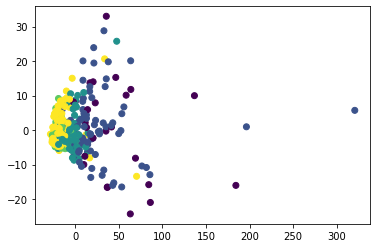

In [141]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(X)

X_ = pca.transform(X)

class_colors = {
    'verybad': 0,
    'bad': 1,
    'moderate': 2,
    'good': 3,
    'verygood': 4
}
y_colors = [class_colors[i] for i in y]

plt.scatter(X_[:, 0], X_[:, 1], c=y_colors)
plt.show()

In [87]:
# import re
# import json

# prog1 = re.compile('feature.*')
# prog2 = re.compile('class.*')

# rows = tree_text_rep.split("\n")

# features = {
#     'feature_0': 'NF',
#     'feature_1': 'NM',
#     'feature_2': 'NTop',
#     'feature_3': 'NLeaf',
#     'feature_4': 'DTMax',
#     'feature_5': 'CogC',
#     'feature_6': 'FoC',
#     'feature_7': 'SCDF',
#     'feature_8': 'RDen'
# }

# def generate_tree(rows, level = 1):
#     left = []
#     right = []
#     reading_left = True

#     for index, row in enumerate(rows):
#         if index > 0 and row.count("|") == level:
#             reading_left = False

#         if reading_left:
#             left.append(row)
#         else:
#             right.append(row)
            
#     left = list(filter(lambda x: x != '', left))
#     right = list(filter(lambda x: x != '', right))
            
#     rule = None
#     label = None
#     leftNode = None
#     rightNode = None
    
#     if len(prog1.findall(left[0])) > 0:
#         r = prog1.findall(left[0])[0]
#         parts_r = r.split(' <= ')
#         index_r = int(parts_r[0].replace('feature_', ''))
#         value_r = float(parts_r[1])
#         rule = {
#             'feature': features["feature_" + str(index_r)],
#             'comparator': '<=',
#             'threshold': value_r
#         }
    
#     if len(left) > 1:
#         leftNode = generate_tree(left[1:], level + 1)
#     else:
#         a = prog2.findall(left[0])
#         if len(a) > 0:
#             label = a[0].replace("class: ", "")
    
#     if len(right) > 1:
#         rightNode = generate_tree(right[1:], level + 1)
    
#     return {
#         'rule': rule,
#         'left': leftNode,
#         'right': rightNode,
#         'label': label
#     }

# a = generate_tree(rows)
# json.dumps(a)